In [1]:
from sklearn import datasets

In [6]:
import numpy as np

In [7]:
iris = datasets.load_iris()

In [11]:
X = iris.data[:, [2, 3]]

In [12]:
y = iris.target

In [13]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [20]:
print('Labels counts in\ny_train:{}\ny_test:{}'.format(np.bincount(y_train), np.bincount(y_test)))

Labels counts in
y_train:[35 35 35]
y_test:[15 15 15]


In [22]:
"""
对特征进行标准化
"""

'\n对特征进行标准化\n'

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
sc = StandardScaler()

In [21]:
# 对训练数据的每个特征维度参数μ（样本均值）和σ（标准偏差）进行估算
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_train_std = sc.transform(X_train)

In [24]:
X_test_std = sc.transform(X_test)

In [25]:
"""
训练感知器模型
"""

'\n训练感知器模型\n'

In [26]:
from sklearn.linear_model import Perceptron

In [54]:
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)

In [55]:
ppn.fit(X_train_std, y_train)

/home/ishikawa407/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
"""
predict方法进行预测
"""

'\npredict方法进行预测\n'

In [57]:
y_pred = ppn.predict(X_test_std)

In [58]:
print('Misclassfield samples:{}'.format((y_test != y_pred).sum()))

Misclassfield samples:3


In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [67]:
"""
plot_decision_regions函数绘制新训练感知器的模型决策区
"""
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolutions=0.02):
    # resolutions 解析度 即坐标精度
    
    # setup marker generator and color map 标记生成器和颜色的映射
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface 绘制决策面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # np.meshgrid 利用矩阵来生成网格点矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        # X[y == cl, 0] X与y的列数必须一致 y==cl 为相等的行索引
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
        

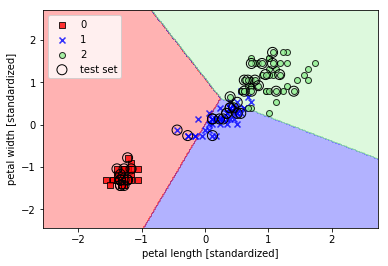

In [74]:
# np.vstack 将两个矩阵垂直合并
# np.hstack 将两个矩阵水平合并
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')

plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')

plt.show()